In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
!pip install openpyxl
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import re

     |████████████████████████████████| 242 kB 896 kB/s            
/kaggle/input/retail-analysis/all_data_copy.xlsx


# ***Retail Store Sales Analysis***
------------------------------------------------------------------

________________________________________________________



## Introduction

----------------------------------------------

Attribute Information:

    Order ID: Order identification number for each product
    Product: Product name
    Quantity Ordered: Amount of items
    Price Each: Price of each product per item in dollars
    Order Date: Date of purchase
    Purchase Address: Address of purchase order

In [2]:
## Introduction

## Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

__________________________________________________

In [3]:
sale=pd.read_excel('/kaggle/input/retail-analysis/all_data_copy.xlsx')#reading excel file with help of panda

In [4]:
sale.shape # verified with given detan as same number of row and column in data

(373700, 6)

Observation

---------------------------------------------
Instances and Farutres are matching with information we already about them.Its means file loaded properly.So,We can go ahead wiht this.

In [5]:
sale.head()#first five readings

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [6]:
sale.tail()#last five readings

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [7]:
sale.dtypes#features data types

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Observation
_______________________

We can see that quanity and price were read as object but its is numeric , date is datetime not object. So, we have to convert it. 

In [8]:
sale.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

Observation

-------------------------------
Null values are present in each column.



In [9]:
sale['Product'].nunique()

20

Observation

---------------------------------

1. Number of Product Types : 20

In [10]:
# changing dtype
sale['Price Each'] = pd.to_numeric(sale['Price Each'], errors='coerce')#covrting object to numeric
sale['Quantity Ordered'] = pd.to_numeric(sale['Quantity Ordered'], errors='coerce')#covrting object to numeric
sale['Order Date'] = pd.to_datetime(sale['Order Date'],errors ='coerce') #covrting object to datetime

In [11]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          372610 non-null  object        
 1   Product           372610 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  372610 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 17.1+ MB


In [12]:
sale.describe(include="all",datetime_is_numeric=True).round()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,371900.0,371900.0,371900,372610
unique,178438,20,NaN,NaN,NaN,140788
top,Order ID,USB-C Charging Cable,NaN,NaN,NaN,Purchase Address
freq,710,43806,NaN,NaN,NaN,710
mean,NaN,NaN,1.0,184.0,2019-07-18 21:54:38.887550208,NaN
min,NaN,NaN,1.0,3.0,2019-01-01 03:07:00,NaN
25%,NaN,NaN,1.0,12.0,2019-04-16 21:05:00,NaN
50%,NaN,NaN,1.0,15.0,2019-07-17 20:40:30,NaN
75%,NaN,NaN,1.0,150.0,2019-10-26 08:14:00,NaN
max,NaN,NaN,9.0,1700.0,2020-01-01 05:13:00,NaN


Observation
_________________________

1. Whole duration of dataser is 1 year from jan-2019 to jan-2020.
2. Overall Top Product is -> USB-C Charging Cable
3. Number of  unique Products -> 20
4. Price of costliset item averall - > 1700
5. Price of cheapest item averall - >   3.0
6. Maxmium quantity ordered - > 9
7. Minmium quanitiy ordered - > 1

In [13]:
sale1 =sale.copy(deep=True)#copy dataframe for future refrence

## Prepare the data frame for further analysis. Clean it, mould it in any manner you see fit.

__________________________________________________

In [14]:
sale1.dropna(inplace=True)#droping null values

In [15]:
sale1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  object        
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  371900 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 19.9+ MB


Observation
____________________________

Null values are removed.

<AxesSubplot:>

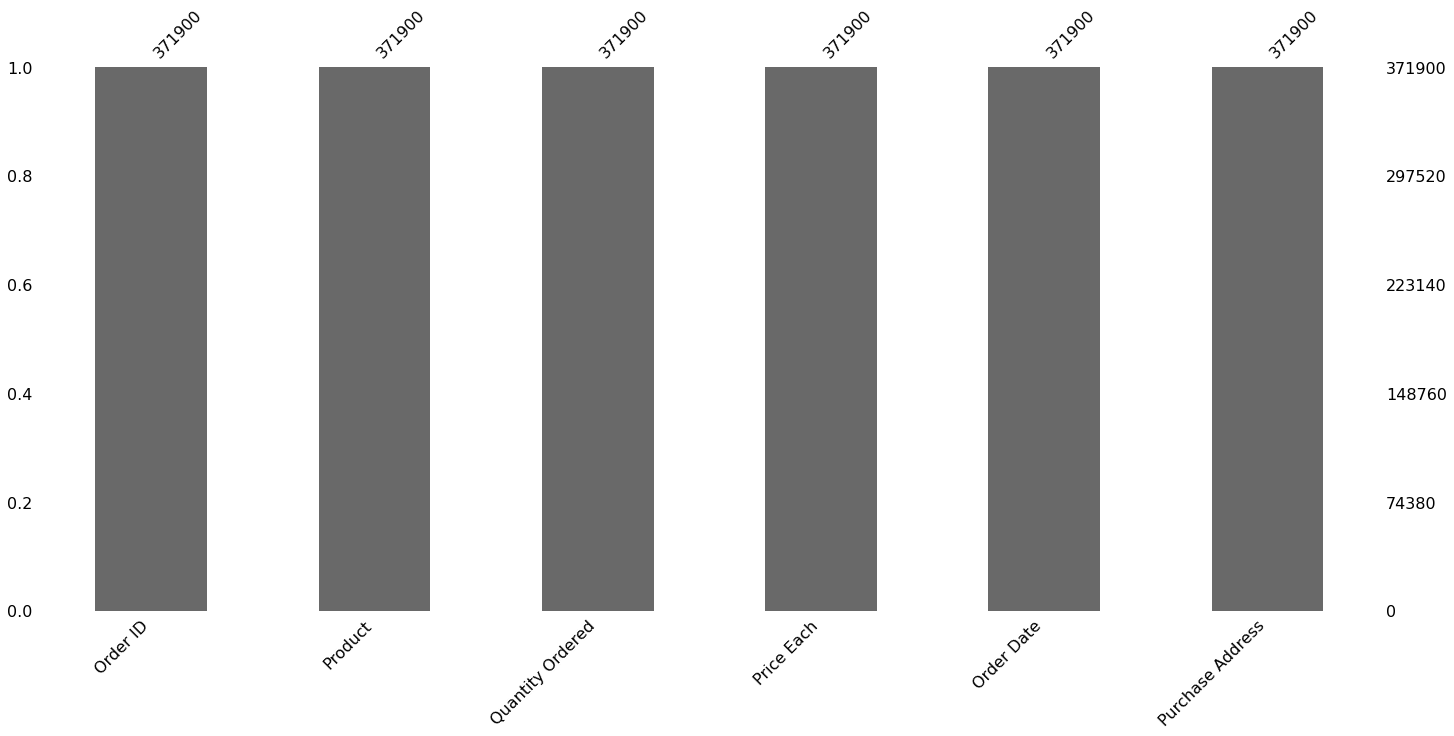

In [16]:
msno.bar(sale1)

### Creating New Features

In [17]:
sale1['Month']=sale1['Order Date'].astype(str).str[5:7]#creating new month column
sale1['Month']=sale1['Month'].astype('int32')#changing month into integer
sale1['Hour'] = sale1['Order Date'].dt.hour#creating hour column
sale1['Day'] =sale1['Order Date'].dt.day_name()#creating day column
sale1[['Street', 'City', 'State']] = sale1['Purchase Address'].str.split(',', expand=True)#creating state,city,state columns
sale1[['state','zip']]=sale1.State.str.extract('(?P<state>.+?) (?P<zip>.+?\S+)')#seprating state state from zip
sale1['sales']=sale1['Price Each']*sale1['Quantity Ordered']#creating sales column

In [18]:
mkt=sale1[['Order ID','Product','Quantity Ordered','Price Each','sales','Month','Day','Hour','State','City']].copy()#improved version
mkt.rename(columns = {'Price Each':'price','Quantity Ordered':'qty','Order ID':'id'}, inplace = True)#renaming some of columns
mkt['City'] = mkt['City'].str.strip()#remove extra space in front of city
#dividind day into different part of days
bins = [-1,6,12,18,24]
labels=['Night','Morning','Afternoon','Evening']
mkt['part_of_day'] = pd.cut(mkt['Hour'], bins=bins, labels=labels)# new column

#Dividing dataframe based on Cities
mkt_SF=mkt[mkt['City']=='San Francisco']
mkt_LA=mkt[mkt['City']=='Los Angeles']
mkt_NY=mkt[mkt['City']=='New York City']
mkt_Bo=mkt[mkt['City']=='Boston']
mkt_At=mkt[mkt['City']=='Atlanta']
mkt_Da=mkt[mkt['City']=='Dallas']
mkt_Se=mkt[mkt['City']=='Seattle']
mkt_Po=mkt[mkt['City']=='Portland']
mkt_Au=mkt[mkt['City']=='Austin']

## Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.

----------------------------------------

In [19]:
mkt.describe(include='all').round()

,id,Product,qty,price,sales,Month,Day,Hour,State,City,part_of_day
count,371900.0,371900,371900.0,371900.0,371900.0,371900.0,371900,371900.0,371900,371900,371900
unique,178437.0,19,NaN,NaN,NaN,NaN,7,NaN,10,9,4
top,160873.0,USB-C Charging Cable,NaN,NaN,NaN,NaN,Tuesday,NaN,CA 94016,San Francisco,Afternoon
freq,10.0,43806,NaN,NaN,NaN,NaN,54350,NaN,89464,89464,133702
mean,NaN,NaN,1.0,184.0,185.0,7.0,NaN,14.0,NaN,NaN,NaN
std,NaN,NaN,0.0,333.0,333.0,4.0,NaN,5.0,NaN,NaN,NaN
min,NaN,NaN,1.0,3.0,3.0,1.0,NaN,0.0,NaN,NaN,NaN
25%,NaN,NaN,1.0,12.0,12.0,4.0,NaN,11.0,NaN,NaN,NaN
50%,NaN,NaN,1.0,15.0,15.0,7.0,NaN,15.0,NaN,NaN,NaN
75%,NaN,NaN,1.0,150.0,150.0,10.0,NaN,19.0,NaN,NaN,NaN


## Answer the following questions using the clean dataset by plotting suitable graphs:

------------------------------

### What is the distribution of sales among different cities in different months?

-------------------------------------

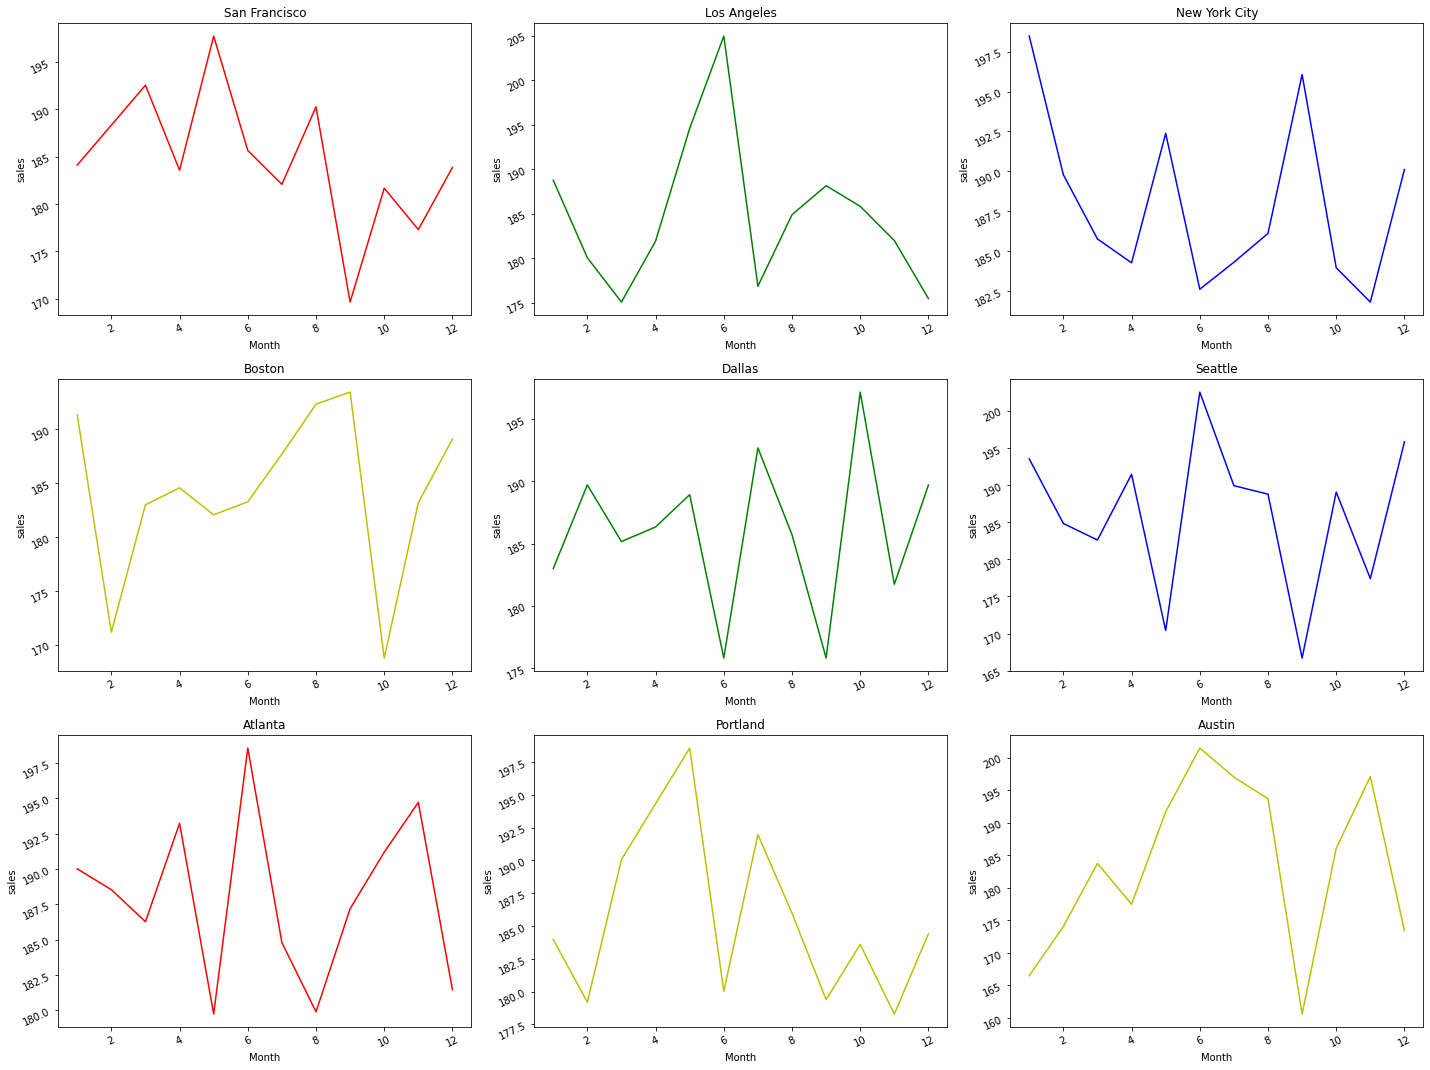

In [20]:
#Peak Hour City Wise
fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 20, 15))
  
sns.lineplot( x = "Month", y = "sales", 
             color = 'r',ci=None, data = mkt_SF, 
             ax = ax[0][0]).set_title('San Francisco')
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Month", y = "sales", 
             color = 'g',ci=None, data = mkt_LA,
             ax = ax[0][1]).set_title('Los Angeles')
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Month", y = "sales", 
             color = 'b',ci=None, data = mkt_NY,
             ax = ax[0][2]).set_title('New York City')
  
ax[0][2].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Month", y = "sales", 
             color = 'y',ci=None, data = mkt_Bo, 
             ax = ax[1][0]).set_title('Boston')
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Month", y = "sales", 
             color = 'r',ci=None, data = mkt_At, 
             ax = ax[2][0]).set_title('Atlanta')
  
ax[2][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Month", y = "sales", 
             color = 'g',ci=None, data = mkt_Da,
             ax = ax[1][1]).set_title('Dallas')
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Month", y = "sales", 
             color = 'b',ci=None, data = mkt_Se,
             ax = ax[1][2]).set_title('Seattle')
  
ax[1][2].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Month", y = "sales", 
             color = 'y',ci=None, data = mkt_Po, 
             ax = ax[2][1]).set_title('Portland')
  
ax[2][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Month", y = "sales", 
             color = 'y',ci=None, data = mkt_Au, 
             ax = ax[2][2]).set_title('Austin')
  
ax[2][2].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)

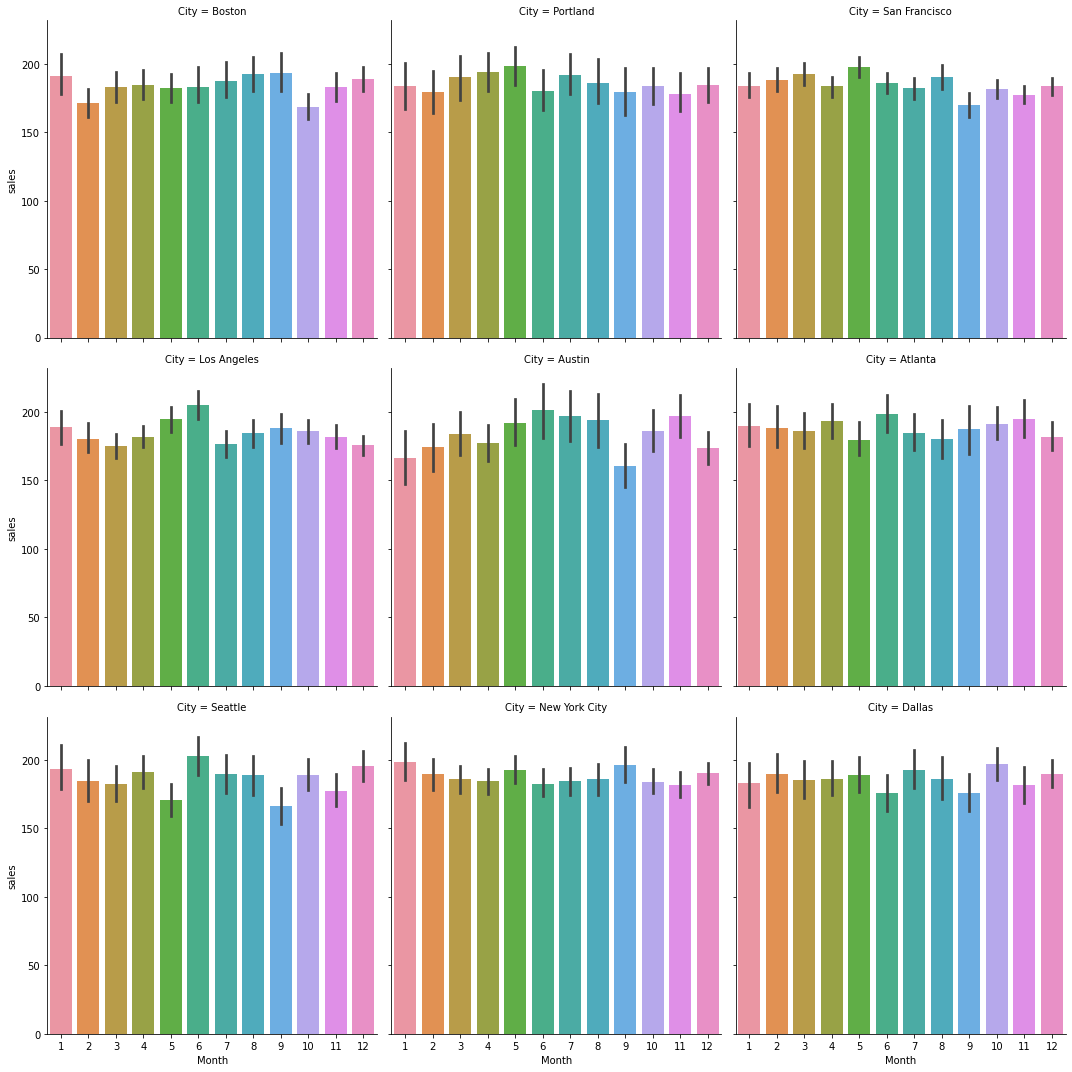

In [21]:
sns.catplot(y='sales', x='Month', col='City',col_wrap=3 ,data=mkt, kind='bar')

### Which City had the highest sales overall?

--------------------------------------------

<AxesSubplot:ylabel='sales'>

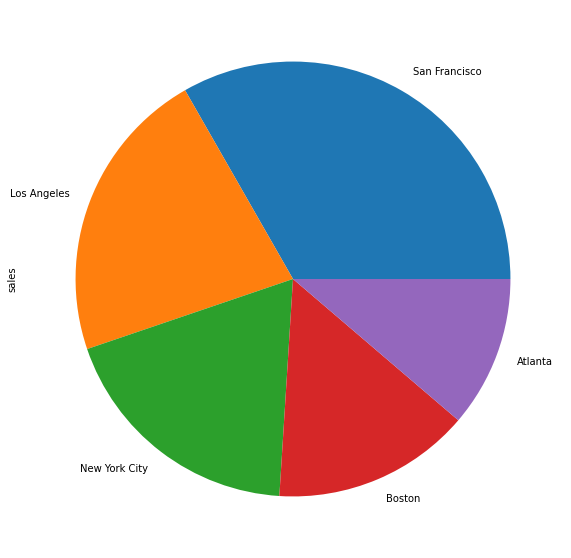

In [22]:
s_c_gp =mkt.groupby(['City'],sort = False)
s_c_gp['sales'].sum().nlargest().plot(kind='pie',figsize=(10, 10))

### Which Month had the highest amount of sales overall?

-------------------------------------------------

<AxesSubplot:ylabel='sales'>

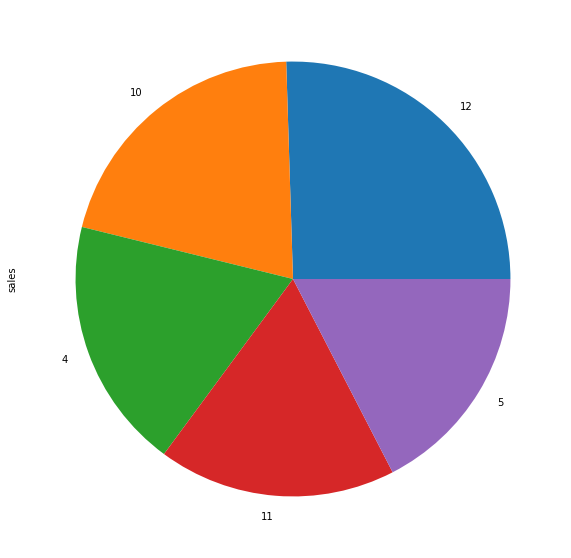

In [23]:
s_m_gp =mkt.groupby(['Month'],sort = False)
s_m_gp['sales'].sum().nlargest().plot(kind='pie',figsize=(10, 10))

### Most bought products per city.

-------------------------------------------

### Based on Quantity

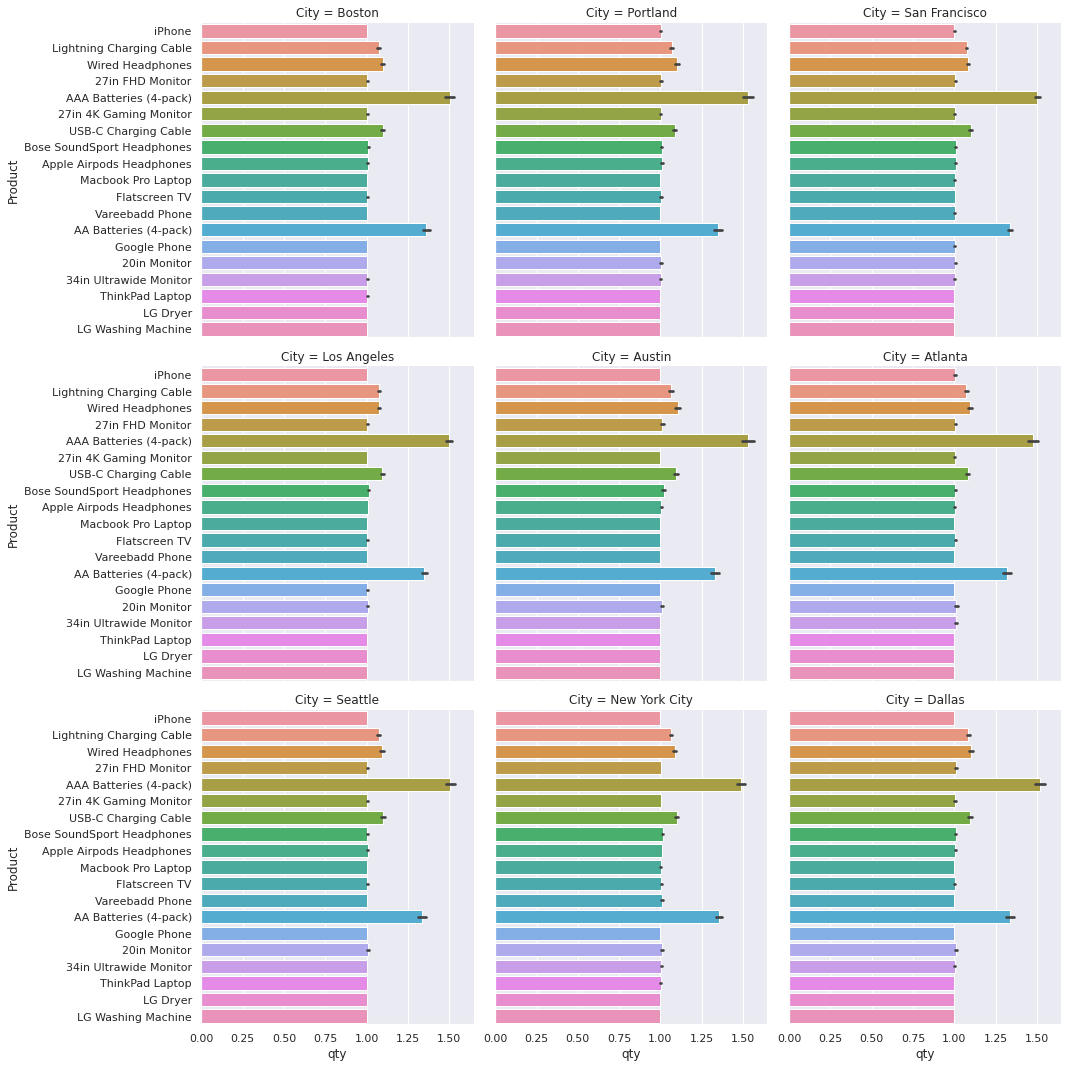

In [24]:
sns.set(rc={'figure.figsize':(30,20)})
sns.catplot(x='qty', y='Product', col='City',col_wrap=3 ,data=mkt, kind='bar')

### Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.

------------------------------------------------

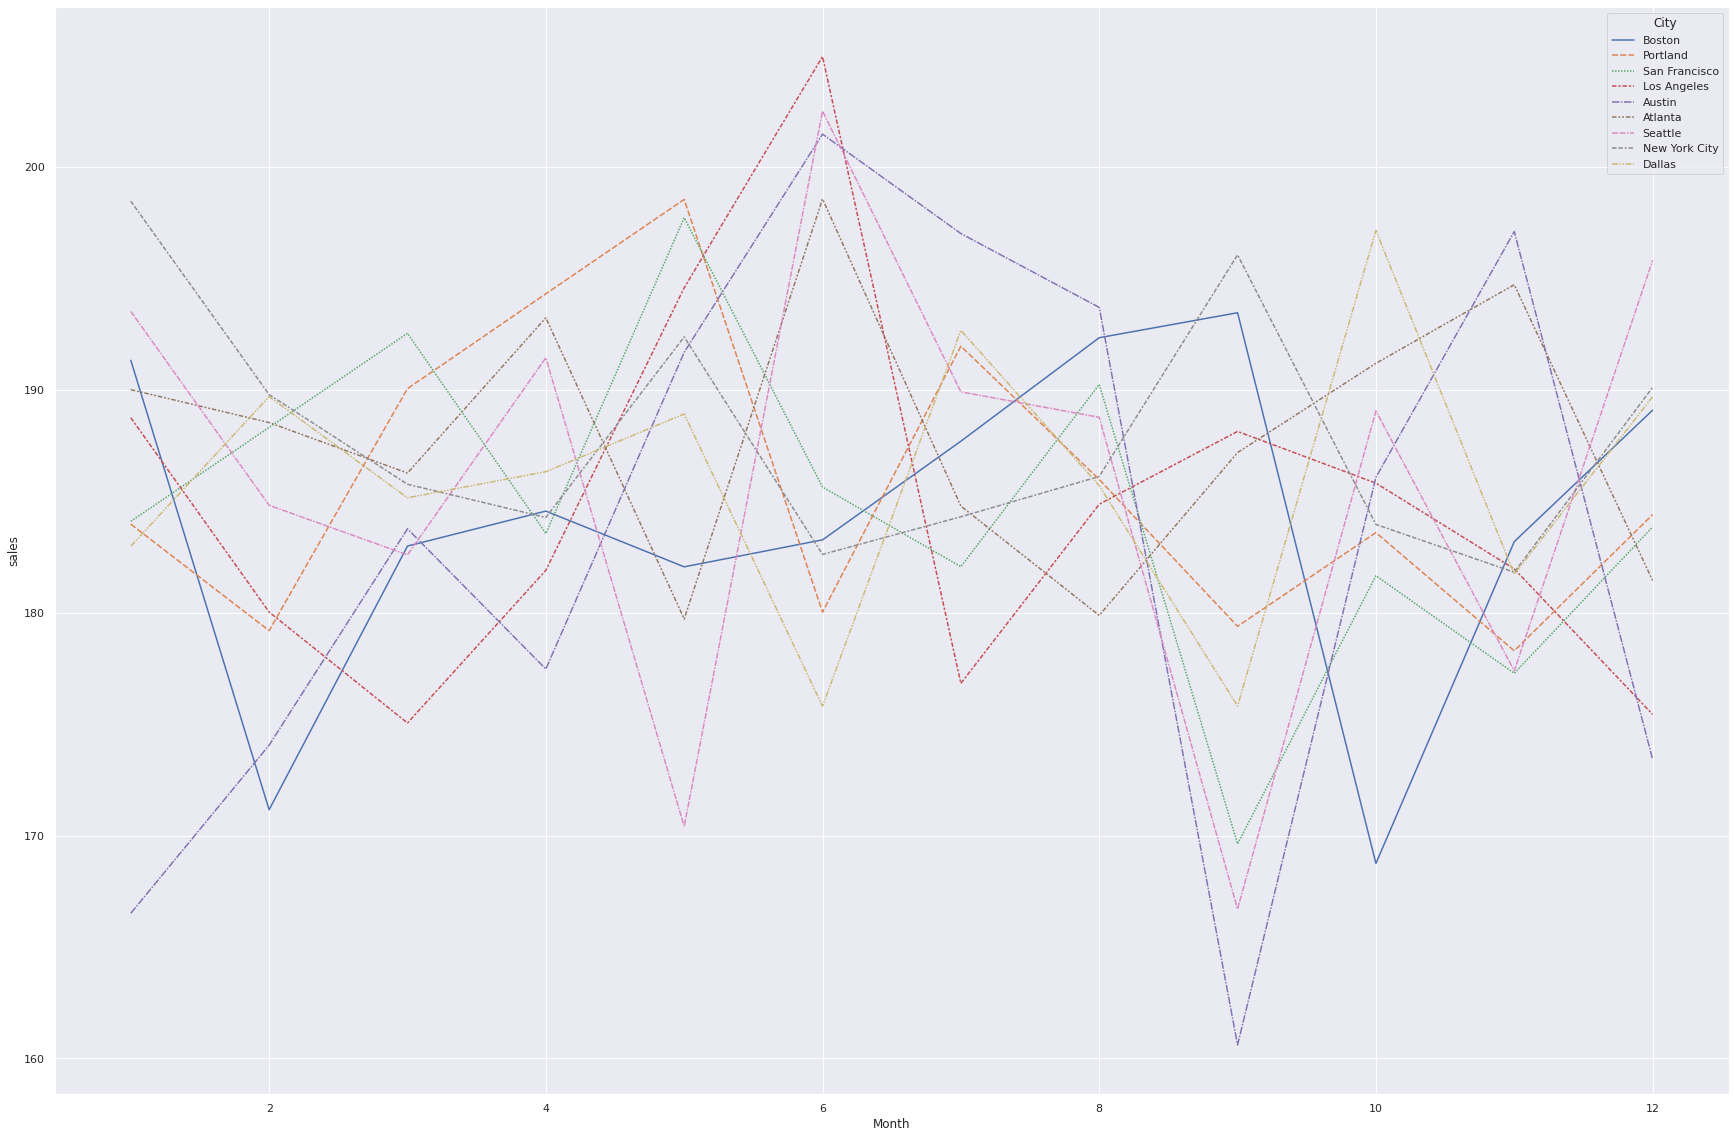

In [25]:
sns.lineplot(data=mkt, x="Month", y="sales", hue="City",ci=None,style="City");

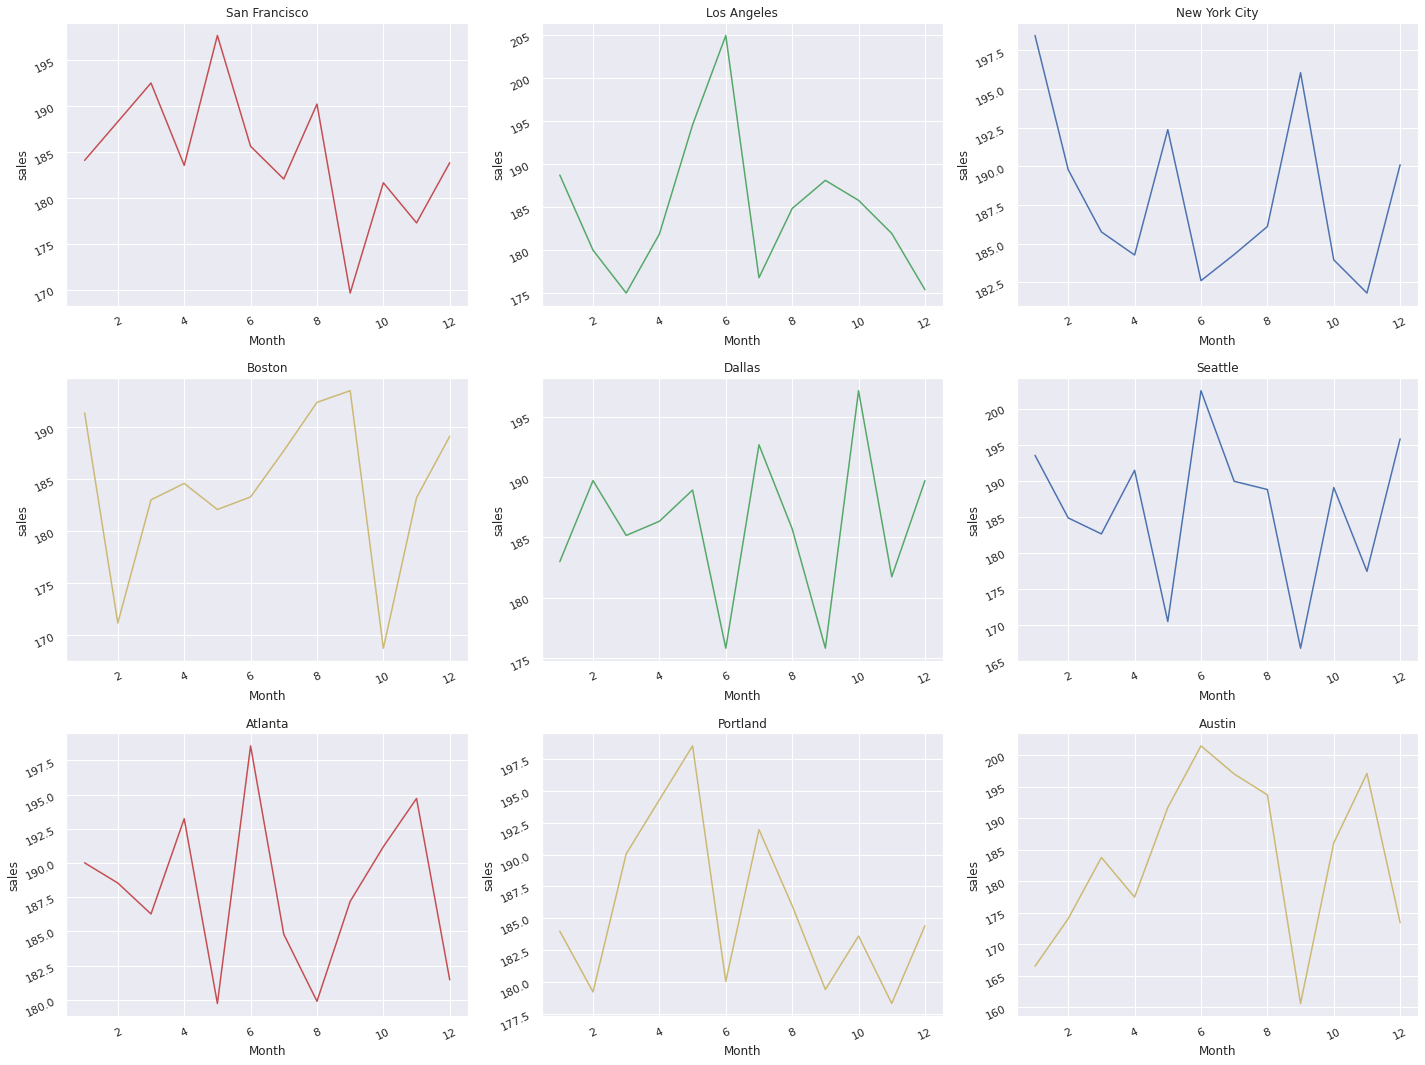

In [26]:
#Peak Hour City Wise
fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 20, 15))
  
sns.lineplot( x = "Month", y = "sales", 
             color = 'r',ci=None, data = mkt_SF, 
             ax = ax[0][0]).set_title('San Francisco')
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Month", y = "sales", 
             color = 'g',ci=None, data = mkt_LA,
             ax = ax[0][1]).set_title('Los Angeles')
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Month", y = "sales", 
             color = 'b',ci=None, data = mkt_NY,
             ax = ax[0][2]).set_title('New York City')
  
ax[0][2].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Month", y = "sales", 
             color = 'y',ci=None, data = mkt_Bo, 
             ax = ax[1][0]).set_title('Boston')
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Month", y = "sales", 
             color = 'r',ci=None, data = mkt_At, 
             ax = ax[2][0]).set_title('Atlanta')
  
ax[2][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Month", y = "sales", 
             color = 'g',ci=None, data = mkt_Da,
             ax = ax[1][1]).set_title('Dallas')
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Month", y = "sales", 
             color = 'b',ci=None, data = mkt_Se,
             ax = ax[1][2]).set_title('Seattle')
  
ax[1][2].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Month", y = "sales", 
             color = 'y',ci=None, data = mkt_Po, 
             ax = ax[2][1]).set_title('Portland')
  
ax[2][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Month", y = "sales", 
             color = 'y',ci=None, data = mkt_Au, 
             ax = ax[2][2]).set_title('Austin')
  
ax[2][2].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)

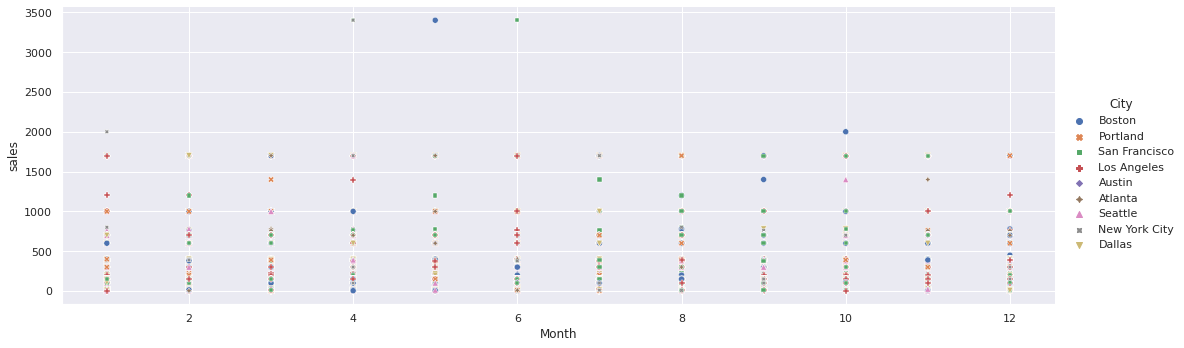

In [27]:
sns.relplot(data=mkt, x="Month", y="sales",style="City",hue="City",height=5,aspect=3);

Observation

---------------------------------------

1. Boston 
2. San Francisco , Boston , Dalla, Settle, New York

## Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city:

---------------------------------------------------

In [28]:
#dividind day into different part of days
bins = [-1,6,12,18,24]
labels=['Night','Morning','Afternoon','Evening']
mkt['part_of_day'] = pd.cut(mkt['Hour'], bins=bins, labels=labels)# new column

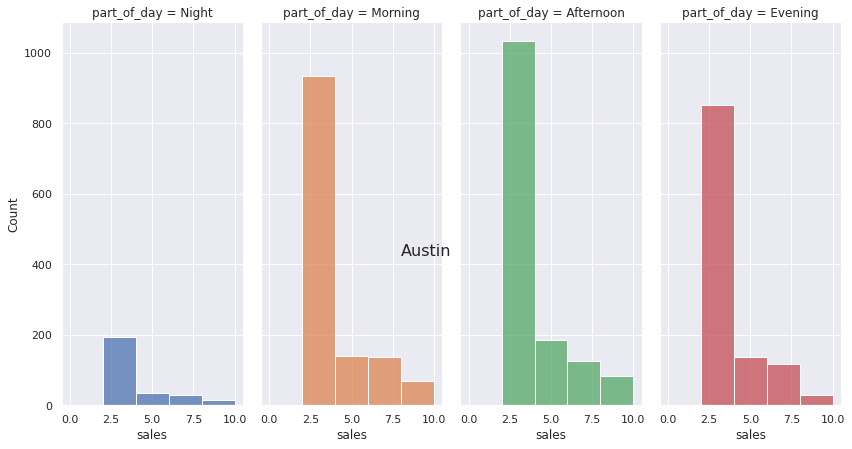

In [29]:
g = sns.FacetGrid(mkt_Au,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Austin', fontsize=16);

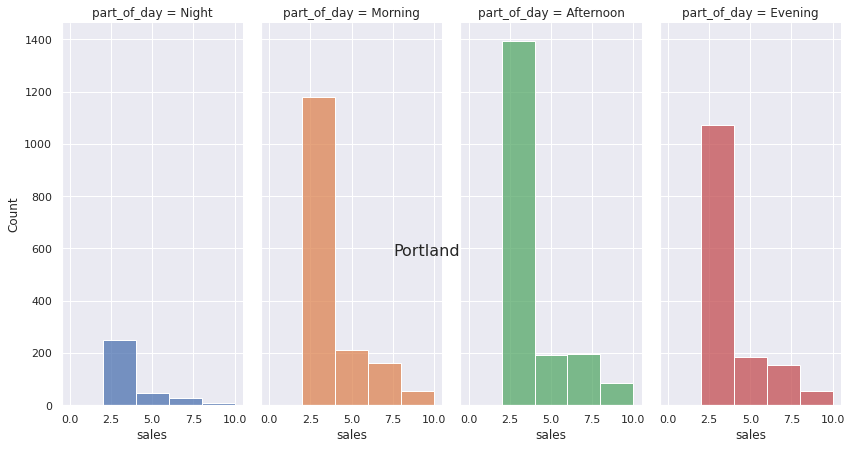

In [30]:
g = sns.FacetGrid(mkt_Po,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Portland', fontsize=16);

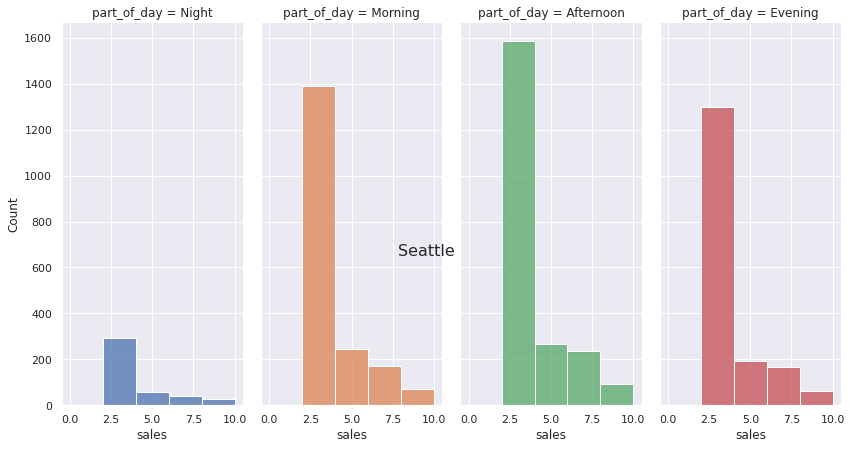

In [31]:
g = sns.FacetGrid(mkt_Se,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Seattle', fontsize=16);

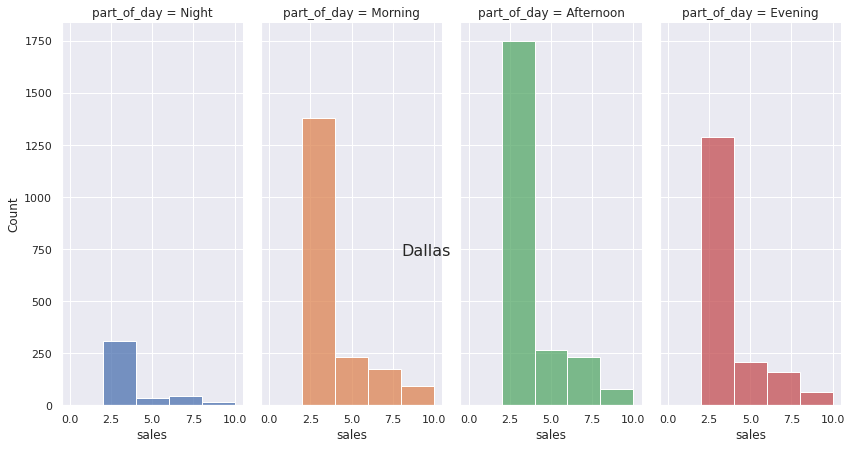

In [32]:
g = sns.FacetGrid(mkt_Da,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Dallas', fontsize=16);

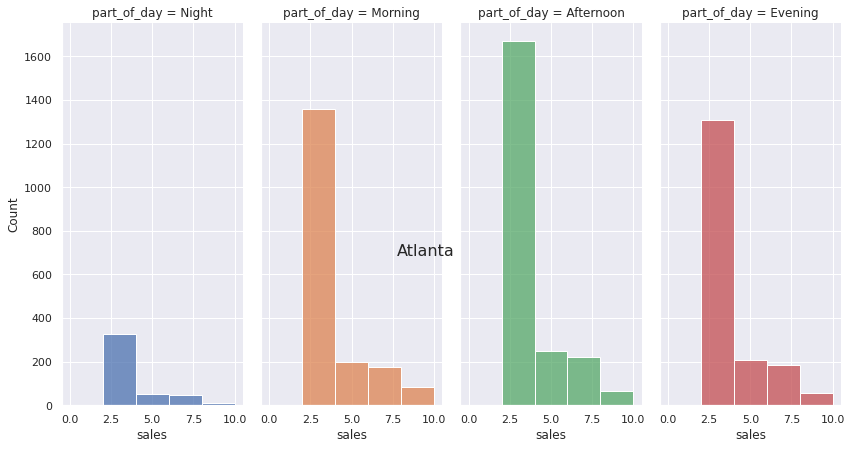

In [33]:
g = sns.FacetGrid(mkt_At,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Atlanta', fontsize=16);

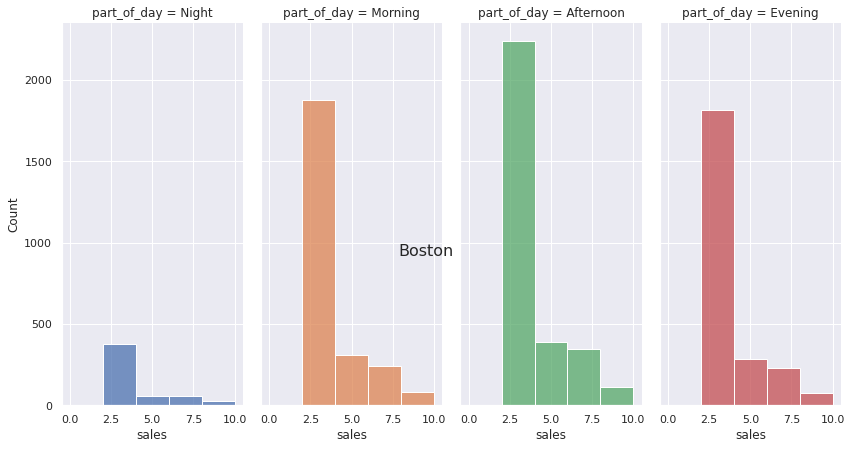

In [34]:
g = sns.FacetGrid(mkt_Bo,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Boston', fontsize=16);

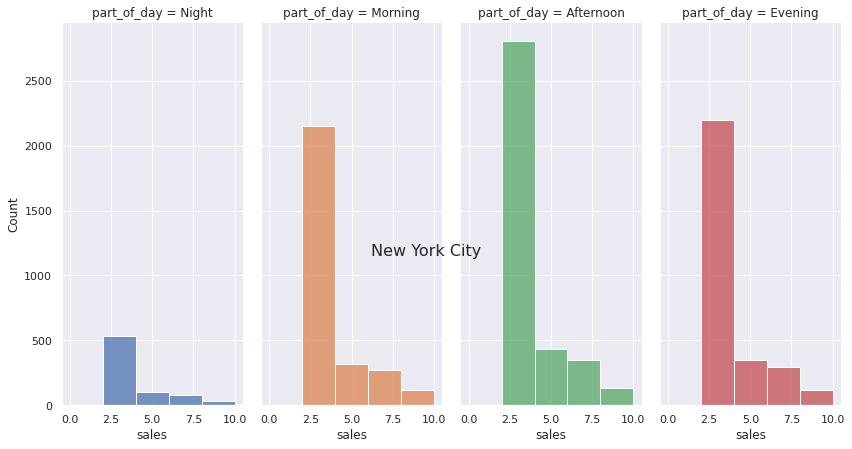

In [35]:
g = sns.FacetGrid(mkt_NY,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('New York City', fontsize=16);

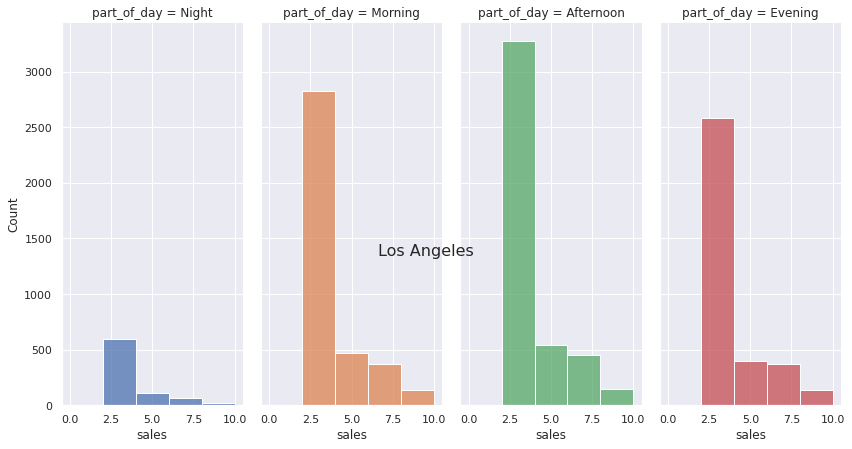

In [36]:
g = sns.FacetGrid(mkt_LA,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('Los Angeles', fontsize=16);

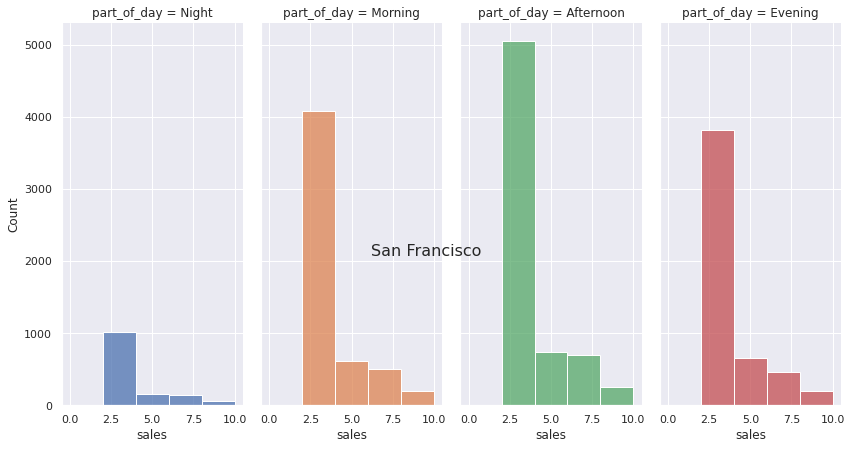

In [37]:
g = sns.FacetGrid(mkt_SF,hue="part_of_day", col="part_of_day",margin_titles=True)
g.map_dataframe(sns.histplot, x="sales",binwidth=2, binrange=(0, 10))
g.fig.subplots_adjust(top=2)
g.fig.suptitle('San Francisco', fontsize=16);

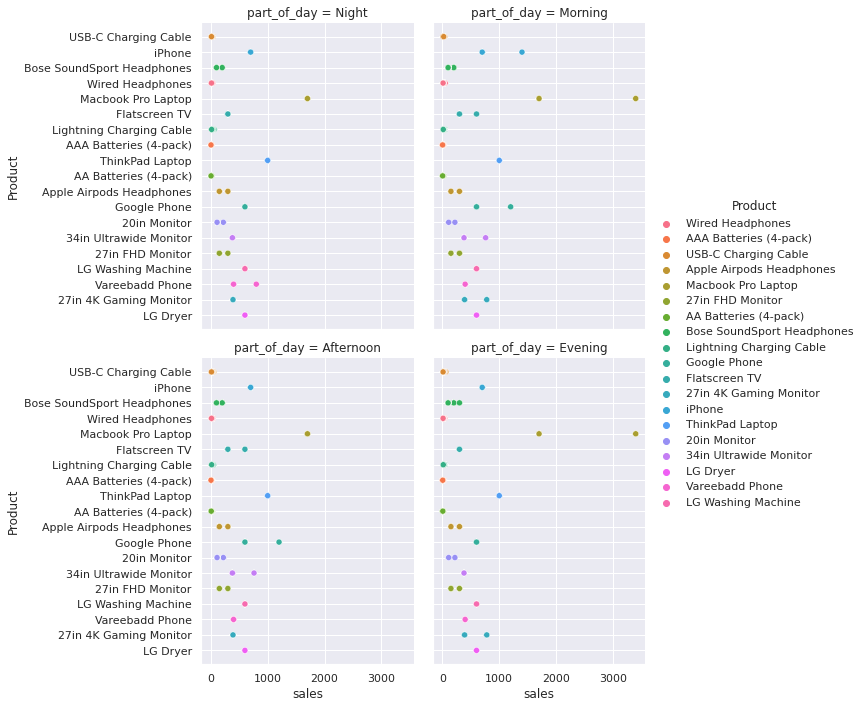

In [38]:
sns.relplot(data=mkt_SF, y="Product", x="sales",col="part_of_day",col_wrap=2,hue="Product")

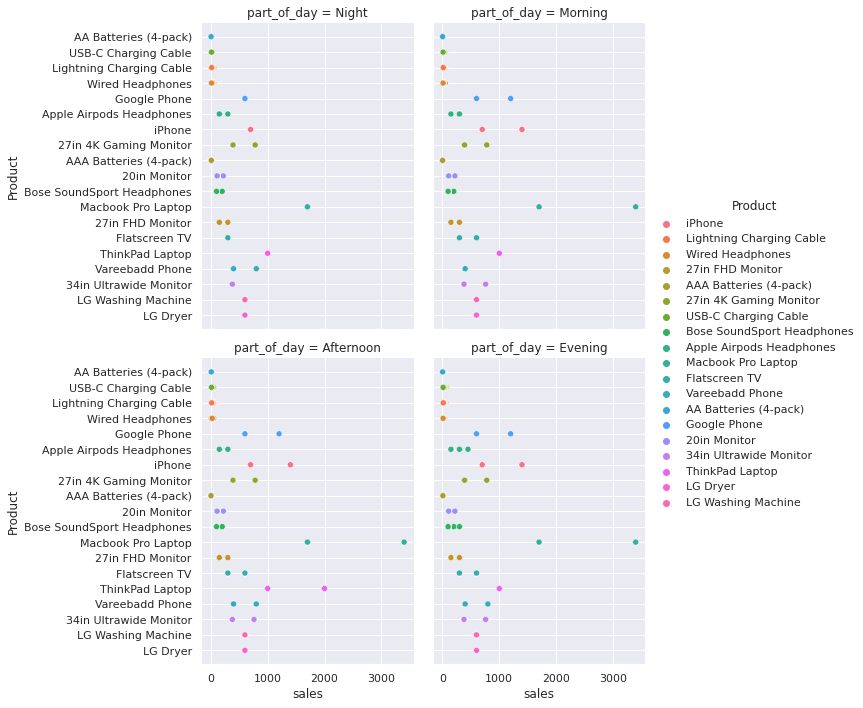

In [39]:
sns.relplot(data=mkt, y="Product", x="sales",col="part_of_day",col_wrap=2,hue="Product")

### What products are mostly sold at different times of the day?

------------------------------------------

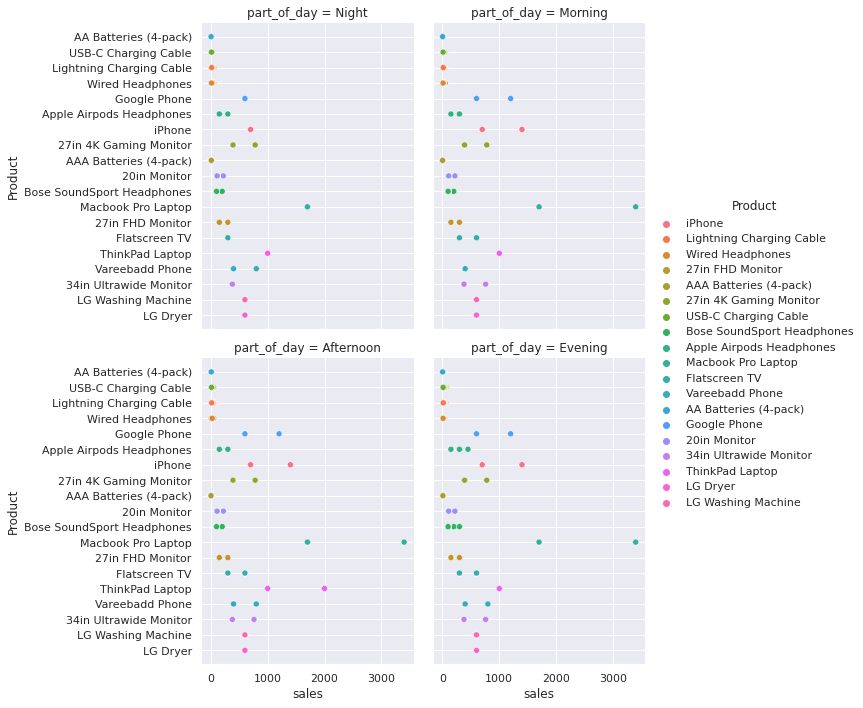

In [40]:
sns.relplot(data=mkt, y="Product", x="sales",col="part_of_day",col_wrap=2,hue="Product")

### Which time of day has the most sales?

---------------------------------------------------

<AxesSubplot:ylabel='sales'>

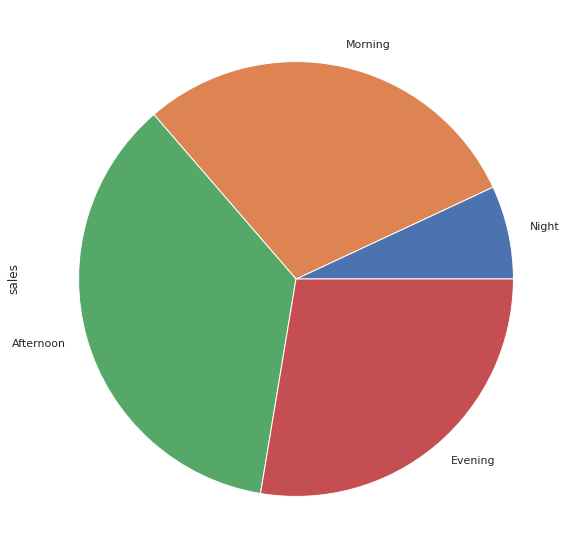

In [41]:
s_c_gp =mkt.groupby(['part_of_day'],sort = False)
s_c_gp['sales'].sum().plot(kind='pie',figsize=(10, 10))

Observation
--------------------------
Afternoon

### Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.

------------------------------------------------

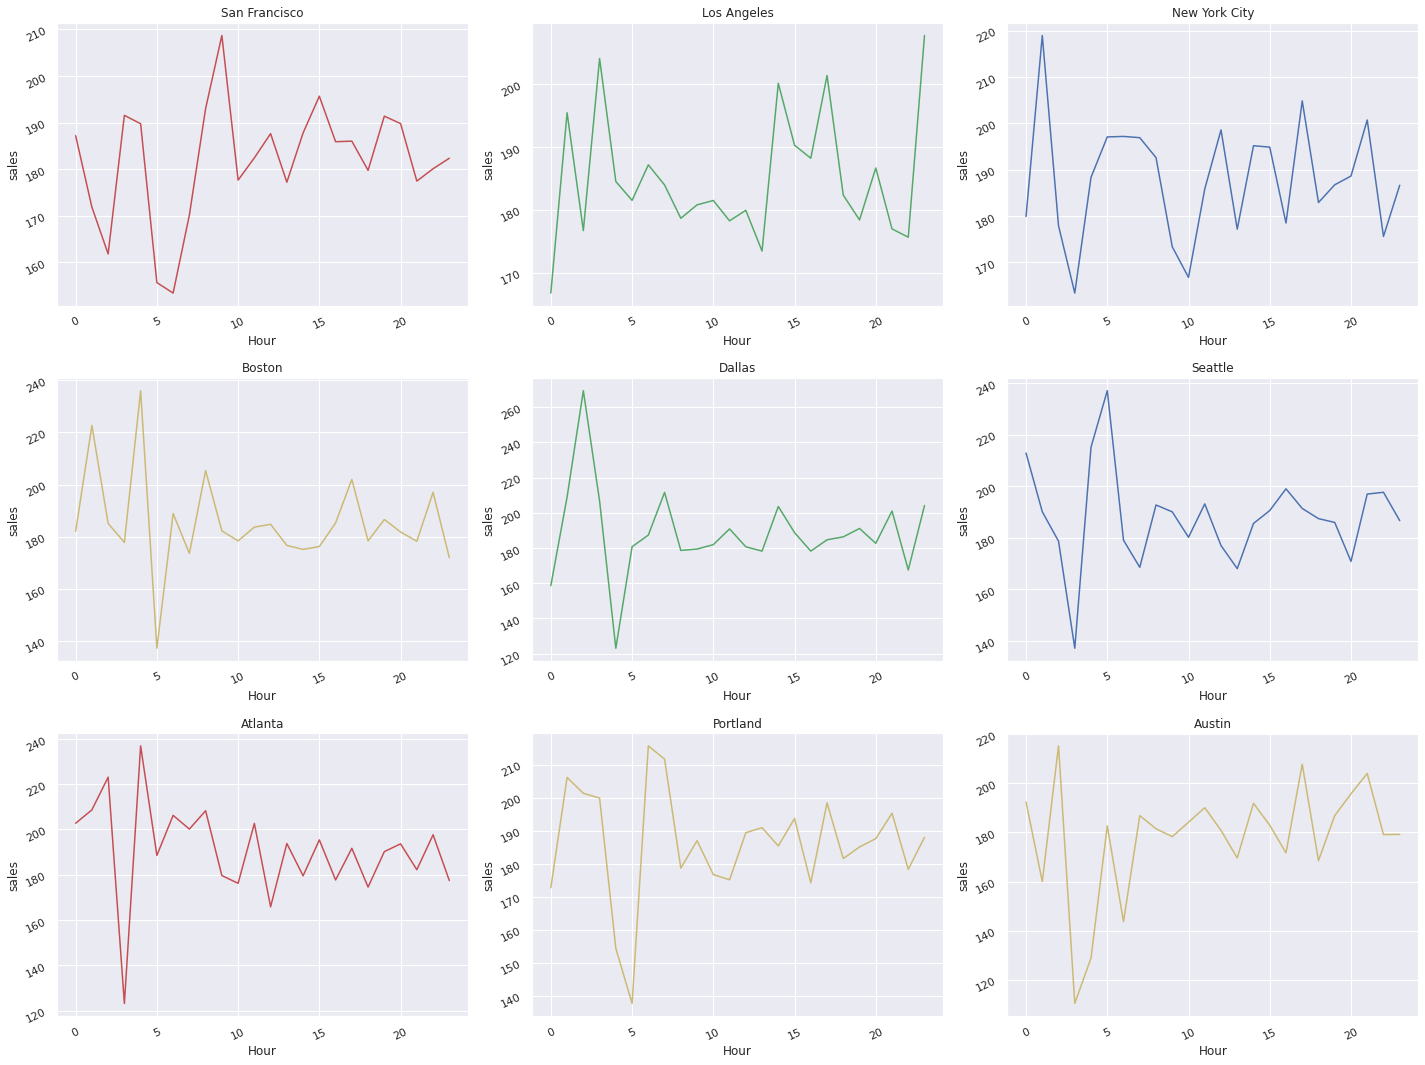

In [42]:
#Peak Hour City Wise
fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 20, 15))
  
sns.lineplot( x = "Hour", y = "sales", 
             color = 'r',ci=None, data = mkt_SF, 
             ax = ax[0][0]).set_title('San Francisco')
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Hour", y = "sales", 
             color = 'g',ci=None, data = mkt_LA,
             ax = ax[0][1]).set_title('Los Angeles')
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Hour", y = "sales", 
             color = 'b',ci=None, data = mkt_NY,
             ax = ax[0][2]).set_title('New York City')
  
ax[0][2].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Hour", y = "sales", 
             color = 'y',ci=None, data = mkt_Bo, 
             ax = ax[1][0]).set_title('Boston')
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Hour", y = "sales", 
             color = 'r',ci=None, data = mkt_At, 
             ax = ax[2][0]).set_title('Atlanta')
  
ax[2][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Hour", y = "sales", 
             color = 'g',ci=None, data = mkt_Da,
             ax = ax[1][1]).set_title('Dallas')
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Hour", y = "sales", 
             color = 'b',ci=None, data = mkt_Se,
             ax = ax[1][2]).set_title('Seattle')
  
ax[1][2].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Hour", y = "sales", 
             color = 'y',ci=None, data = mkt_Po, 
             ax = ax[2][1]).set_title('Portland')
  
ax[2][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Hour", y = "sales", 
             color = 'y',ci=None, data = mkt_Au, 
             ax = ax[2][2]).set_title('Austin')
  
ax[2][2].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)

Observation

-----------------------------------------

1. Seattle - 05:00:00
2. Portland - 05:30:00
3. Austin - 03:00:00
4. Boston  - 04:30:00
5. Atlanta - 04:30:00
6. Dallas - 04:00:00
7. San Fransico - 08:00:00
8. Los Angeles - 22:00:00
9. New York City - 01:00:00

### Best Product based on sale for each city

In [43]:
#each city group by Product
SF_p_gp=mkt_SF.groupby('Product')
LA_p_gp=mkt_LA.groupby('Product')
NY_p_gp=mkt_NY.groupby('Product')
Bo_p_gp=mkt_Bo.groupby('Product')
At_p_gp=mkt_At.groupby('Product')
Da_p_gp=mkt_Da.groupby('Product')
Se_p_gp=mkt_Se.groupby('Product')
Po_p_gp=mkt_Po.groupby('Product')
Au_p_gp=mkt_Au.groupby('Product')

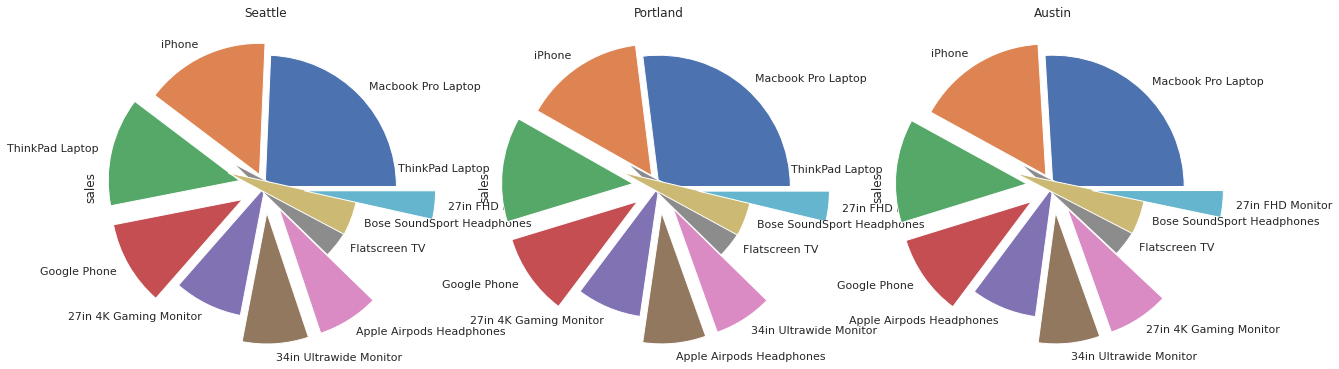

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fg=(0,0.1,0.2,0.2,0,0.2,0.2,-0.3,-0.3,0.3)
Se_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[0],figsize=(20, 15),explode=fg).set_title('Seattle')
Po_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[1],figsize=(20, 15),explode=fg).set_title('Portland')
Au_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[2],figsize=(20, 15),explode=fg).set_title('Austin');

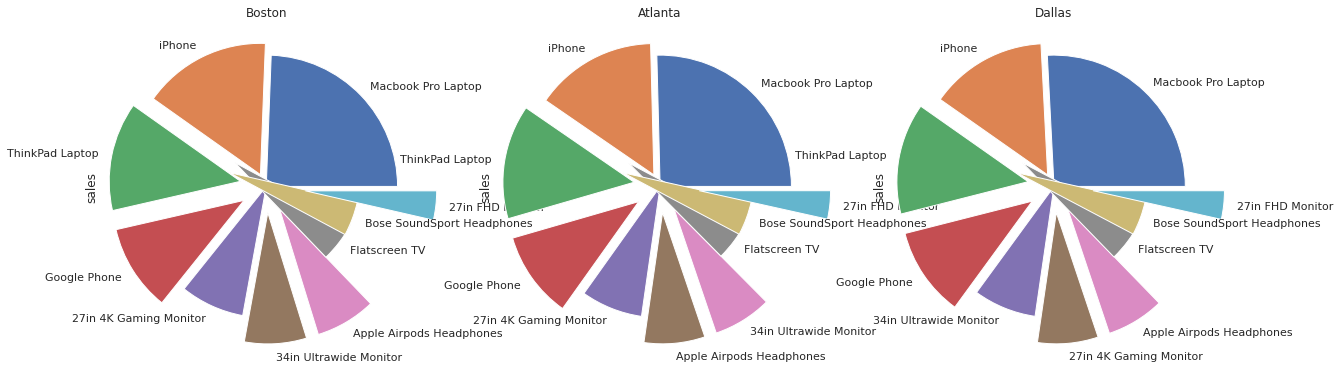

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Bo_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[0],figsize=(20, 15),explode=fg).set_title('Boston');
At_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[1],figsize=(20, 15),explode=fg).set_title('Atlanta');
Da_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[2],figsize=(20, 15),explode=fg).set_title('Dallas');

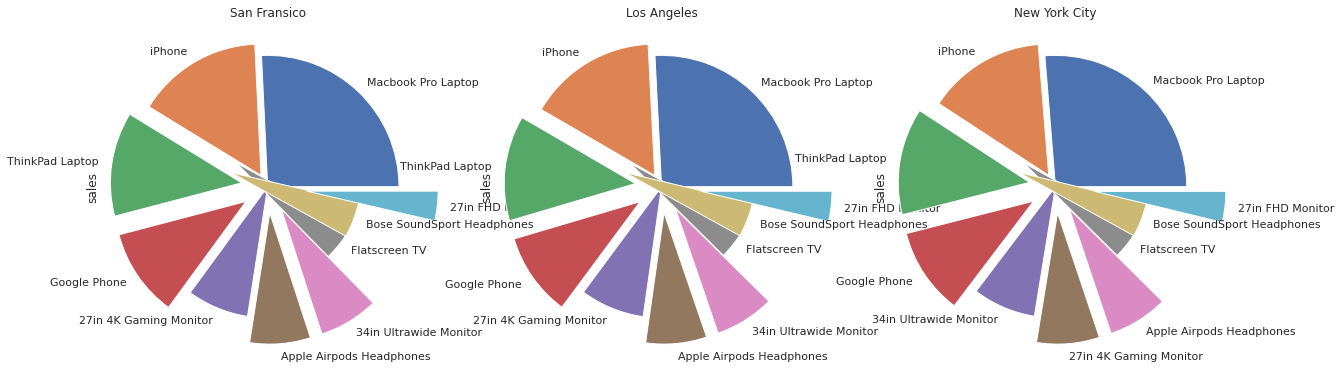

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3)
SF_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[0],figsize=(20, 15),explode=fg).set_title('San Fransico')
LA_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[1],figsize=(20, 15),explode=fg).set_title('Los Angeles')
NY_p_gp['sales'].sum().nlargest(10).plot(kind='pie',ax=axes[2],figsize=(20, 15),explode=fg).set_title('New York City');

### Best Product based on quanity for each city

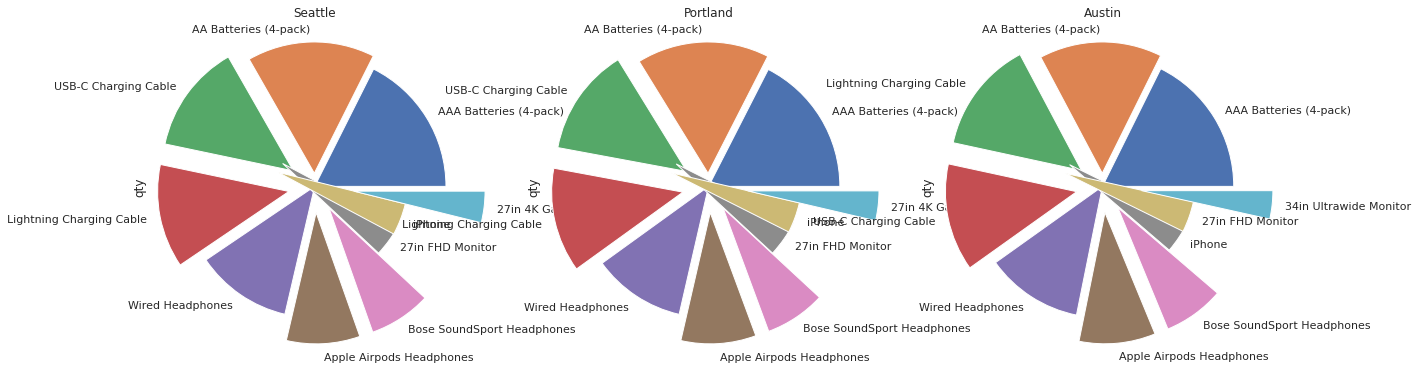

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fg=(0,0.1,0.2,0.2,0,0.2,0.2,-0.3,-0.3,0.3)
Se_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[0],figsize=(20, 15),explode=fg).set_title('Seattle')
Po_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[1],figsize=(20, 15),explode=fg).set_title('Portland')
Au_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[2],figsize=(20, 15),explode=fg).set_title('Austin');

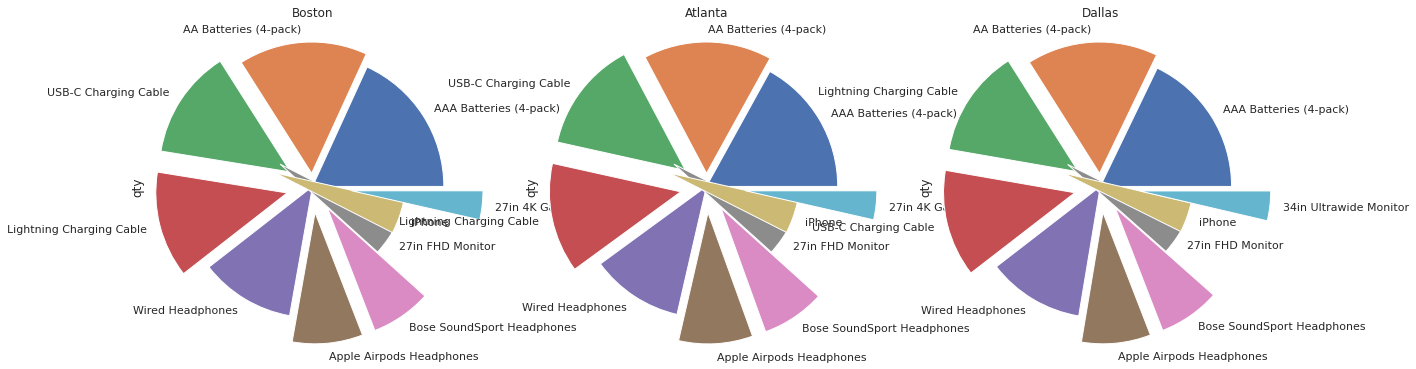

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Bo_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[0],figsize=(20, 15),explode=fg).set_title('Boston');
At_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[1],figsize=(20, 15),explode=fg).set_title('Atlanta');
Da_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[2],figsize=(20, 15),explode=fg).set_title('Dallas');

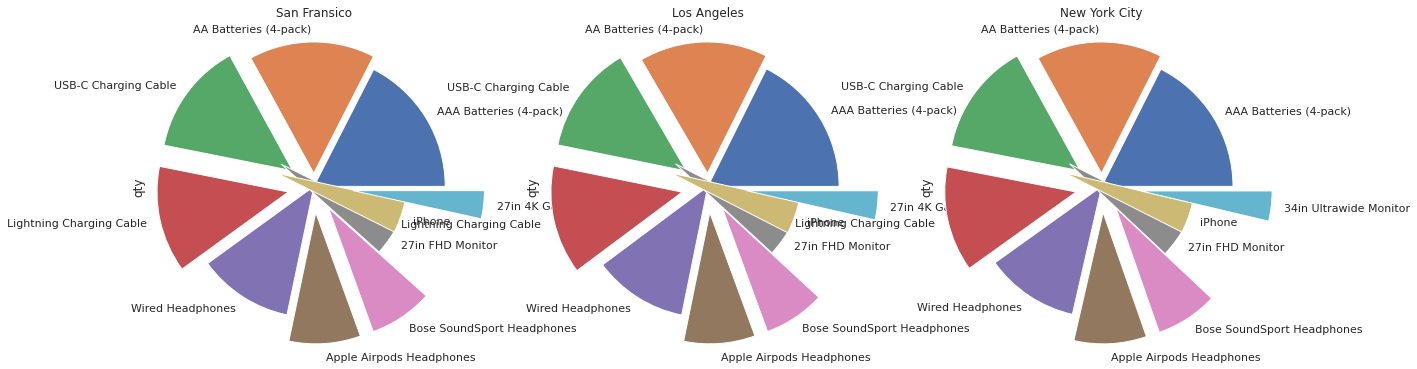

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3)
SF_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[0],figsize=(20, 15),explode=fg).set_title('San Fransico')
LA_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[1],figsize=(20, 15),explode=fg).set_title('Los Angeles')
NY_p_gp['qty'].sum().nlargest(10).plot(kind='pie',ax=axes[2],figsize=(20, 15),explode=fg).set_title('New York City');

## Find out the pair of products that are most sold together. 
-----------------------------------------------------------

In [50]:
sms=mkt.copy(deep=True)

 ### Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.
 
 ------------------------------------------------------

In [51]:
df_itms_togthrs = sms.groupby(['id','Product'])['qty'].sum()
df_itms_togthrs.head()

id        Product                 
141234.0  iPhone                      2.0
141235.0  Lightning Charging Cable    2.0
141236.0  Wired Headphones            4.0
141237.0  27in FHD Monitor            2.0
141238.0  Wired Headphones            2.0
Name: qty, dtype: float64

In [52]:
df_itms_togthrss = df_itms_togthrs.unstack().fillna(0)
df_itms_togthrss.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
id,,,,,,,,,,,,,,,,,,,
141234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
141235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
141236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
141237.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [53]:
# Encode the frequency of description to 0 or 1
encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthrss = df_itms_togthrss.applymap(encode)
df_itms_togthrss.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
id,,,,,,,,,,,,,,,,,,,
141234.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
141235.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
141236.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
141237.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141238.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
rep_items = apriori(df_itms_togthrss, min_support = 0.001, use_colnames = True, verbose = 1)
rep_items.head()

Processing 36 combinations | Sampling itemset size 3


,support,itemsets
0,0.022966,(20in Monitor)
1,0.034886,(27in 4K Gaming Monitor)
2,0.042020,(27in FHD Monitor)
3,0.034600,(34in Ultrawide Monitor)
4,0.115122,(AA Batteries (4-pack))


In [55]:
rules = association_rules(rep_items, metric = "confidence", min_threshold = 0.00000002)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple Airpods Headphones),(iPhone),0.087005,0.038333,0.002090,0.024026,0.626767,-0.001245,0.985341
1,(iPhone),(Apple Airpods Headphones),0.038333,0.087005,0.002090,0.054532,0.626767,-0.001245,0.965654
2,(Bose SoundSport Headphones),(Google Phone),0.074525,0.030946,0.001278,0.017145,0.554035,-0.001029,0.985958
3,(Google Phone),(Bose SoundSport Headphones),0.030946,0.074525,0.001278,0.041289,0.554035,-0.001029,0.965333
4,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865
5,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374
6,(Wired Headphones),(Google Phone),0.105623,0.030946,0.002365,0.022391,0.723534,-0.000904,0.991248
7,(Google Phone),(Wired Headphones),0.030946,0.105623,0.002365,0.076422,0.723534,-0.000904,0.968383
8,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370
9,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880


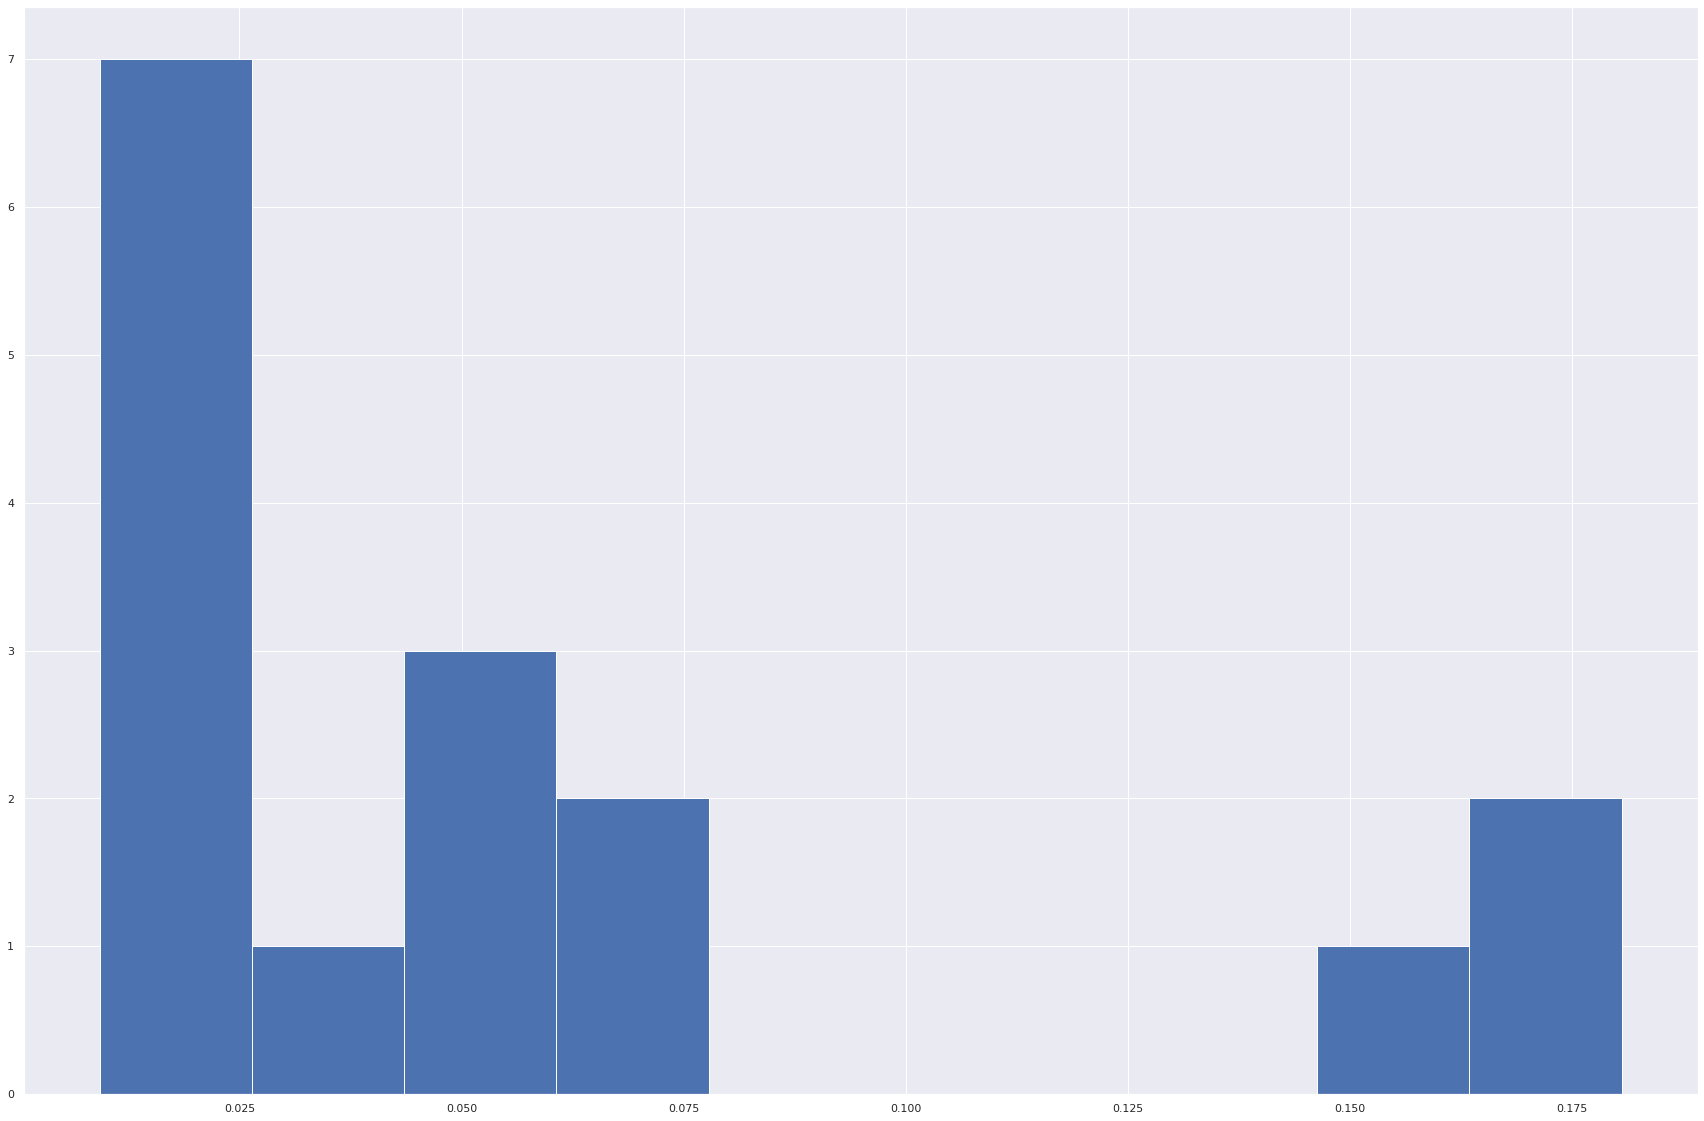

In [56]:
plt.hist(rules['confidence'])
plt.show()

In [57]:
# Show the rules that have confidance > 0.05
high_confidance = rules[rules['confidence'] > 0.05]
result = high_confidance [['antecedents', 'consequents']]

In [58]:
result

,antecedents,consequents
1,(iPhone),(Apple Airpods Headphones)
4,(Google Phone),(USB-C Charging Cable)
7,(Google Phone),(Wired Headphones)
8,(iPhone),(Lightning Charging Cable)
10,(Vareebadd Phone),(USB-C Charging Cable)
15,(iPhone),(Wired Headphones)


Results

-------------------------------

The results of association analysis show which item is frequently purchased with other items. 